In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.naive_bayes import MultinomialNB

In [2]:
import nltk #nltk here stands for Natural Language Toolkit. Used for working with data in human readable lang.
from nltk.corpus import stopwords #imports a list of common words that are often removed during text proc.
from collections import Counter #freq. analysis 

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

#here i encountered an encoding error on the first two tries. the issue was resolved by setting the encoding to 'latin-1'

In [4]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [5]:
df.columns 

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
column_to_remove = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df = df.drop(column_to_remove, axis=1)

In [7]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
df.shape

(5572, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
#The above results show that the dataset is imbalanced (ham is common and occurs 4825 times in the dataset). This means most values are labelled ham. There are also 30 duplicated messages, as v2 indicates 

In [12]:
df[df.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [13]:
df = df.drop_duplicates()
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
df.describe()

,v1,v2
count,5169,5169
unique,2,5169
top,ham,Rofl. Its true to its name
freq,4516,1


In [15]:
df["v1"].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

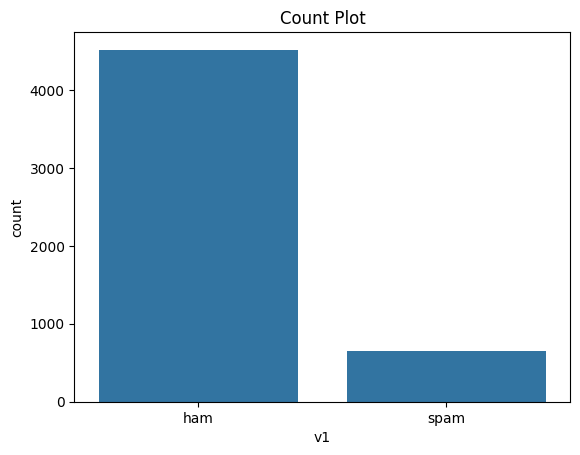

In [16]:
sns.countplot(data=df, x='v1')
plt.xlabel('v1')
plt.ylabel('count')
plt.title('Count Plot')
plt.show()

In [17]:
df.loc[df["v1"] == "spam", "Category"] = 0
df.loc[df["v1"] == "ham", "Category" ] = 1

df.head()

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


In [18]:
#to seperate the feature v2 and target (category) data

X=df['v2']
y=df['Category']

In [19]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [20]:
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5567    0.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: Category, Length: 5169, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)                              
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [23]:
model = LogisticRegression()
model.fit(X_train_features,y_train)

LogisticRegression()

In [26]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 96.32406287787182 %
Accuracy on test data: 96.0348162475822 %


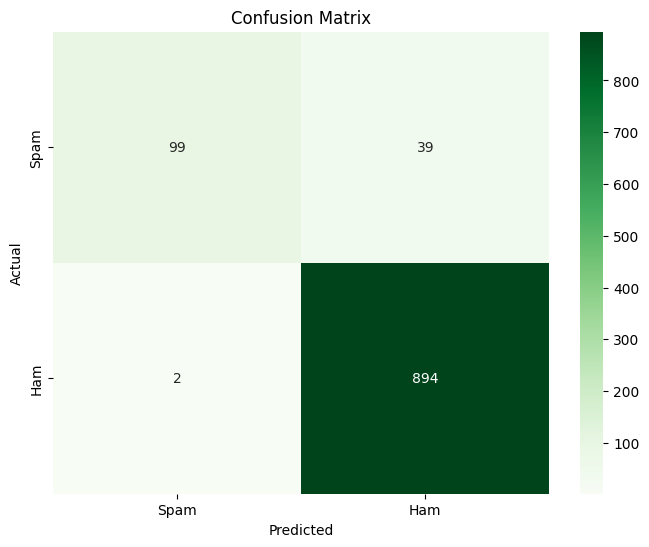

In [27]:
conf_matrix = confusion_matrix(y_test, prediction_on_test_data)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar="False", xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
classification_rep = classification_report(y_test, prediction_on_test_data,target_names=['Spam', 'Ham'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

        Spam       0.98      0.72      0.83       138
         Ham       0.96      1.00      0.98       896

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.90      1034
weighted avg       0.96      0.96      0.96      1034



In [32]:
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]    #all this on the basis of Spam, No-spam
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)

Accuracy :  0.960348162475822
Precision :  0.9581993569131833
Recall :  0.9977678571428571
Specificity :  0.717391304347826


In [ ]:
#Now, to make predictions on new input

📩 Email Content:
 Dear John, I hope this email finds you well. Attached is the report you requested for our upcoming meeting.

🔍 Prediction: Ham Mail ✅


C:\Users\SSC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


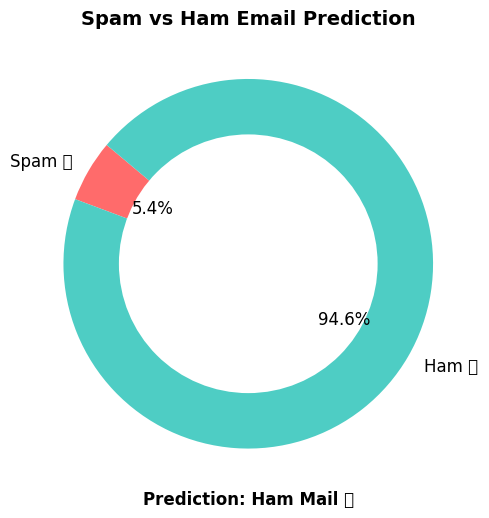

In [36]:
import matplotlib.pyplot as plt
import numpy as np 

spam_email = "Congratulations! You've won a luxury vacation package worth $10,000! Click here to claim your prize now!"
ham_email = "Dear John, I hope this email finds you well. Attached is the report you requested for our upcoming meeting."
input_your_email = ham_email

input_data_features = feature_extraction.transform([input_your_email])

prediction = model.predict(input_data_features)
prediction_prob = model.predict_proba(input_data_features)[0]

labels = ['Spam 🚫', 'Ham ✅']
colors = ['#ff6b6b', '#4ecdc4']

result = "Ham Mail ✅" if prediction[0] == 1 else "Spam Mail 🚫"

print("📩 Email Content:\n", input_your_email)
print("\n🔍 Prediction:", result)

plt.figure(figsize=(6, 6))

wedges, texts, autotexts = plt.pie(
    prediction_prob,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

# Create donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Title
plt.title("Spam vs Ham Email Prediction", fontsize=14, fontweight='bold')

# Highlight predicted class
plt.text(0, -1.3, f"Prediction: {result}",
         ha='center', fontsize=12, fontweight='bold')

plt.show()